# Fashion MNIST Image Classification
---

## Import Libraries

In [119]:
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, roc_curve, auc

## Prepare Data

- convert ubyte to a dataframe/csv.

In [121]:
def read_ubyte(fp_img, fp_lbl, fp_out=None):
	l= []
	with gzip.open(fp_lbl, 'rb') as f:
		f.read(8)
		l= [[x] for x in f.read()]
	
	with gzip.open(fp_img, 'rb') as f:
		f.read(16)
		for i in range(len(l)):
			l[i].extend([c for c in f.read(28*28)])

	if fp_out is not None:
		with open(fp_out, 'w') as f:
			f.write(','.join(['label']+[f'{i}' for i in range(28*28)])+'\n')
			for row in l:
				f.write(','.join(str(col) for col in row)+'\n')
	
	return pd.DataFrame(l, columns=['label']+[i for i in range(28*28)])


## Load Data

- load dataframe.
- check for missing values.
- check for duplicated rows.

In [122]:
df_trn= read_ubyte('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')

In [123]:
print('duplicated rows: ', df_trn.duplicated().sum())
print('missing values:  ', df_trn.isna().sum().sum())

duplicated rows:  0
missing values:   0


In [124]:
df_tst= read_ubyte('t10k-images-idx3-ubyte.gz',  't10k-labels-idx1-ubyte.gz')

In [125]:
print('duplicated rows: ', df_tst.duplicated().sum())
print('missing values:  ', df_tst.isna().sum().sum())

duplicated rows:  0
missing values:   0


In [126]:
df_trn['label'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [127]:
df_tst['label'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

select 5 classses

In [128]:
df_trn= df_trn[df_trn['label']<5]

In [129]:
df_tst= df_tst[df_tst['label']<5]

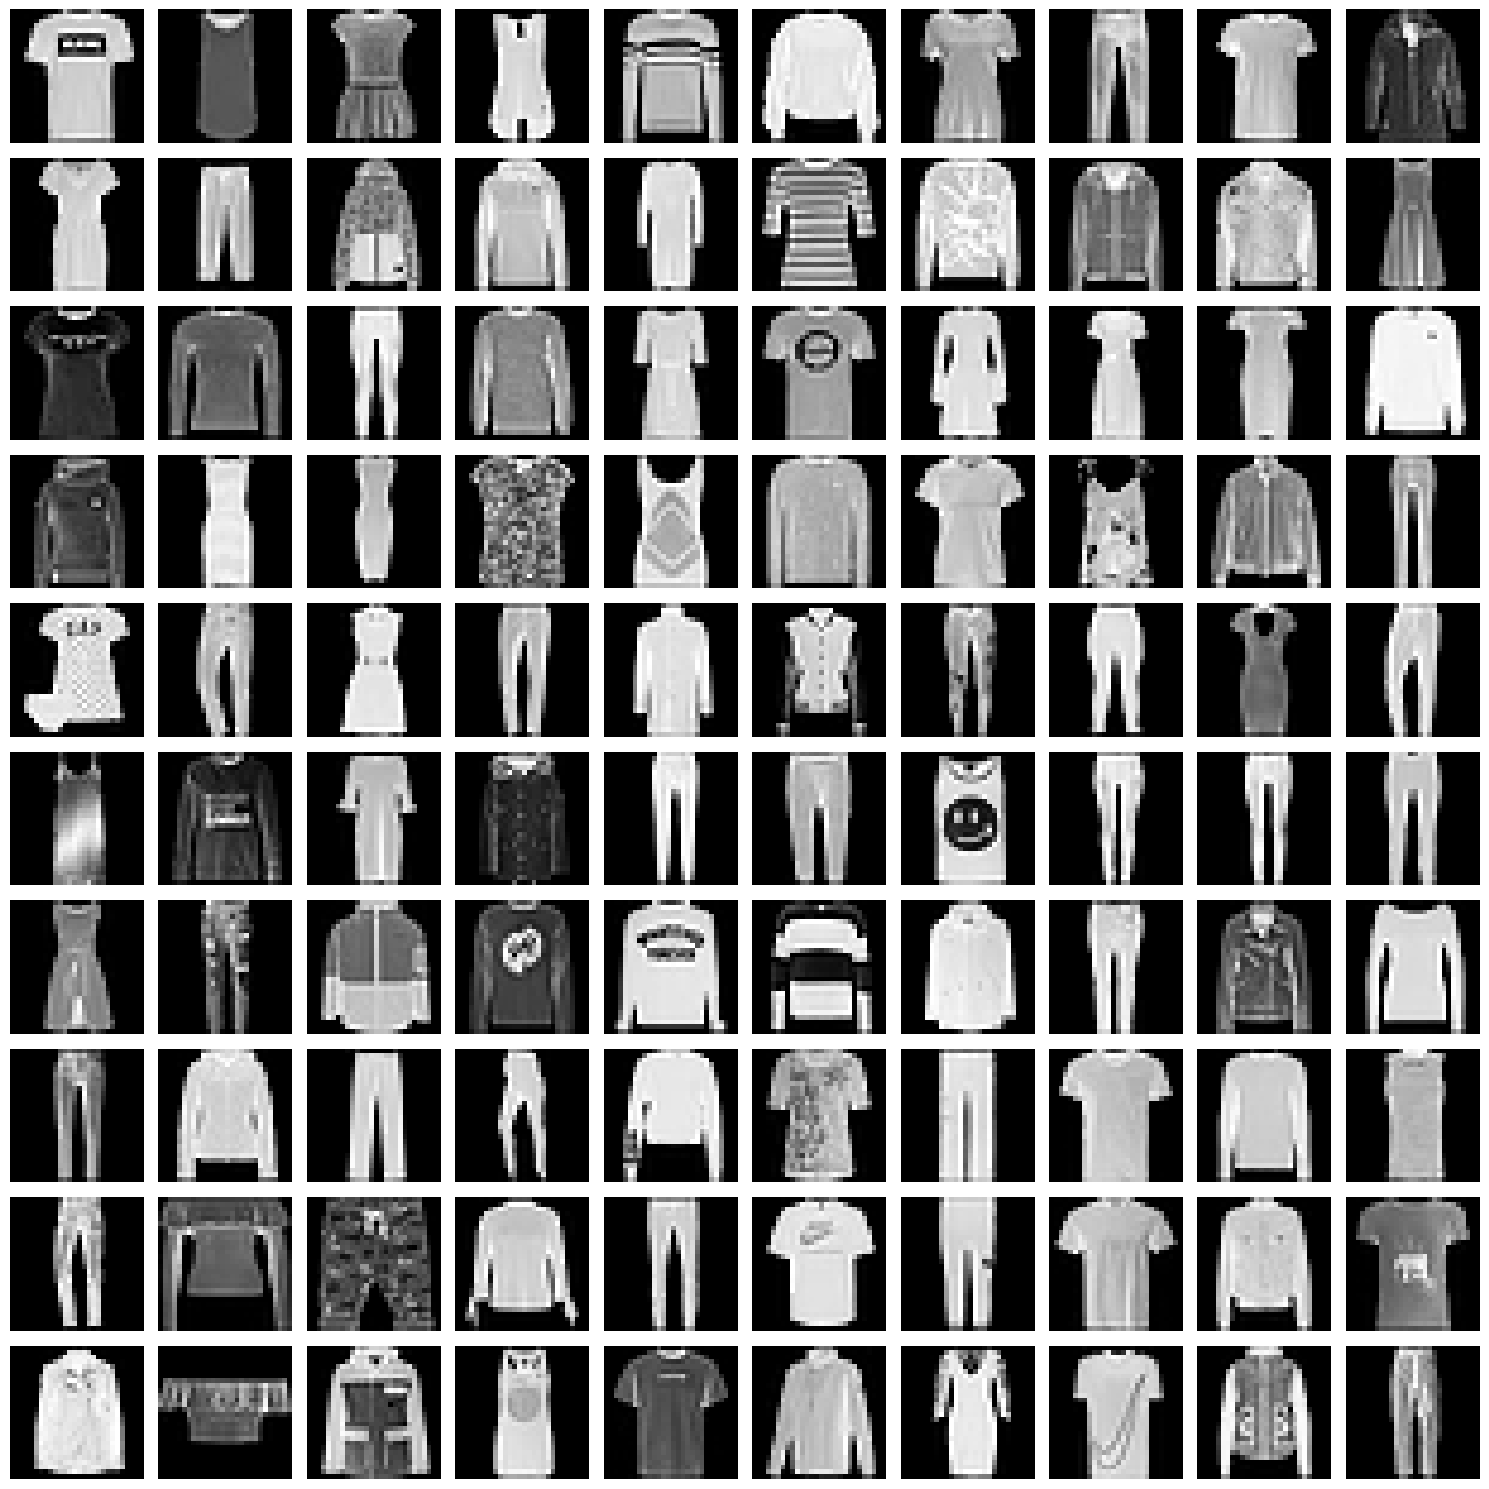

In [130]:
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(df_trn.iloc[i, 1:]).reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

## Data Preprocessing

### Feature Extraction
- select 5 classes

In [131]:
X_trn= df_trn.drop('label', axis=1)
y_trn= df_trn['label']

X_tst= df_tst.drop('label', axis=1)
y_tst= df_tst['label']

### Scaling

In [132]:
scaler= StandardScaler()

In [133]:
X_trn= scaler.fit_transform(X_trn)
X_tst= scaler.transform(X_tst)

### PCA

In [ ]:
#TODO

## Model Training

In [ ]:
def model_evaluate(model):
	pred= model.predict(X_tst)
	print('Train Accuracy:  ', accuracy_score(y_trn, model.predict(X_trn)))
	print('Test Accuracy:   ', accuracy_score(y_tst, pred))
	print('Precision Score: ', precision_score(y_tst, pred, average='macro'))
	print('Recall Score:    ', recall_score(y_tst, pred, average='macro'))
	print('Classification Report\n', classification_report(y_tst, pred))
	ConfusionMatrixDisplay(confusion_matrix(y_tst, pred)).plot()
	plt.show()

In [135]:
def model_roc(model):
	fpr= {}
	tpr= {}
	roc_auc= {}

	# plt.figure(figsize=(12, 8))
	for i in range(len(y_tst.unique())):
		fpr[i], tpr[i], _= roc_curve(y_tst==i, model.predict_proba(X_tst)[:,i])
		roc_auc[i]= auc(fpr[i], tpr[i])
		plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
	plt.plot([0, 1], [0, 1], 'k--')
	plt.xlim([0.0, 1.0])
	plt.ylim([0.0, 1.05])
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.title('Receiver Operating Characteristic (ROC) Curve')
	plt.legend(loc='lower right')
	plt.tight_layout()
	plt.show()

### Logistic Regression

In [ ]:
lr= LogisticRegression(max_iter=10000, solver='lbfgs', warm_start=True)

In [163]:
lr.fit(X_trn, y_trn)

LogisticRegression(max_iter=10000, verbose=1, warm_start=True)

Train Accuracy:   0.9193
Test Accuracy:    0.8594
Precision Score:  0.8596219887694259
Recall Score:     0.8593999999999999
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1000
           1       0.95      0.95      0.95      1000
           2       0.80      0.79      0.80      1000
           3       0.84      0.85      0.85      1000
           4       0.81      0.81      0.81      1000

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



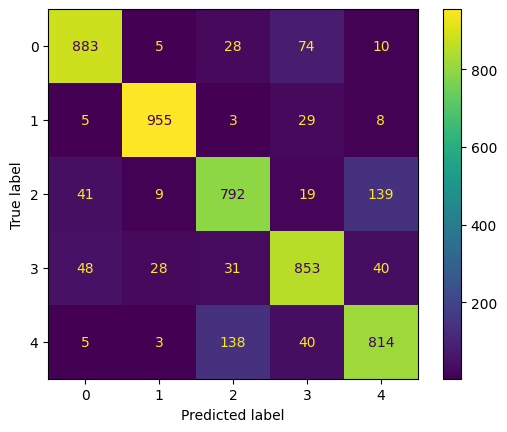

In [160]:
model_evaluate(lr)

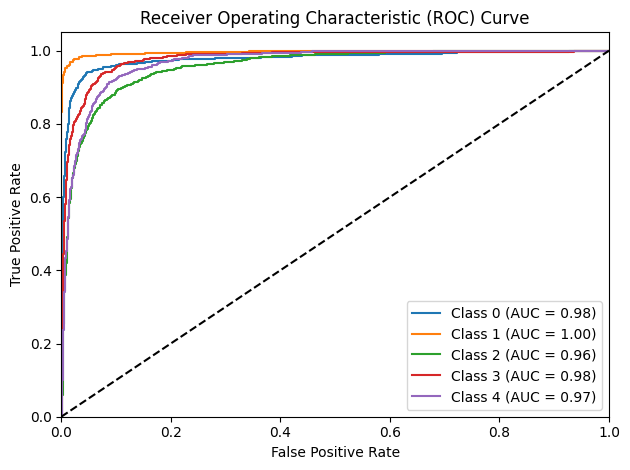

In [161]:
model_roc(lr)

### KNNClassifier

In [139]:
knn= KNeighborsClassifier()

In [ ]:
knn.fit(X_trn, y_trn)

Train Accuracy:   0.9285666666666667
Test Accuracy:    0.8886
Precision Score:  0.8898070419519328
Recall Score:     0.8886000000000001
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.84      0.82      1000
           3       0.92      0.88      0.90      1000
           4       0.83      0.82      0.83      1000

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



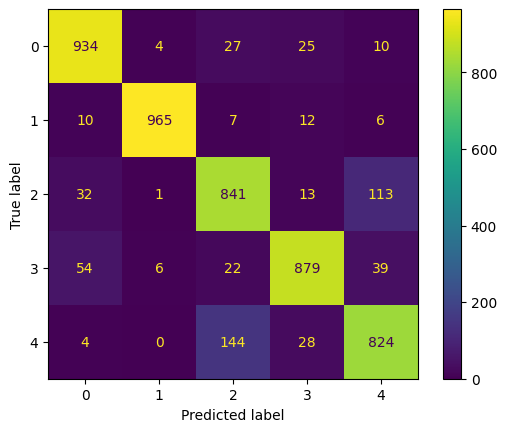

In [140]:
model_evaluate(knn)

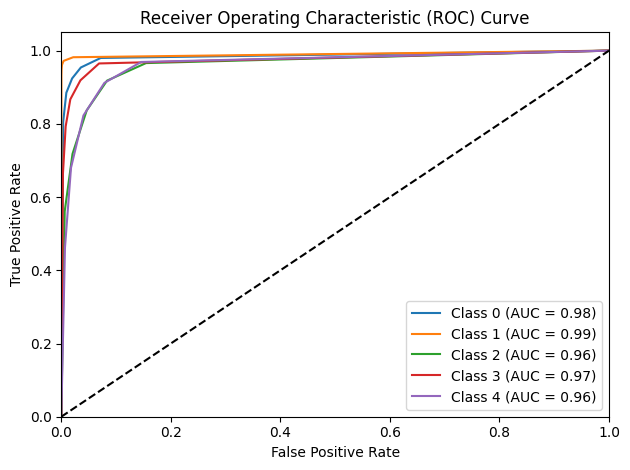

In [141]:
model_roc(knn)

## Use Tensorflow for loss curve

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#TODO

## Other Models

In [ ]:
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier

In [ ]:
# def model_report(model, verbose=True):
# 	model.fit(X_trn, y_trn)

# 	y_pred=   model.predict(X_tst)
# 	trnScore= model.score(X_trn, y_trn)
# 	tstScore= model.score(X_tst, y_tst)
# 	accScore= accuracy_score(y_tst, y_pred)
# 	preScore= precision_score(y_tst, y_pred, average='macro')
# 	recScore= recall_score(y_tst, y_pred, average='macro')
# 	cm= confusion_matrix(y_tst, y_pred)

# 	if verbose:
# 		print('Train Score: %f'%trnScore)
# 		print('Test Score:  %f'%tstScore)
# 		print('Accuracy Score: %f'%accScore)
# 		print('Precision Score: %f'%preScore)
# 		print('Recall Score: %f'%recScore)

# 		ConfusionMatrixDisplay(cm).plot()
# 		plt.show()
# 		print()
	
# 	return {
# 		'trn':  trnScore,
# 		'tst':  tstScore,
# 		'acc':  accScore,
# 		'pre':  preScore,
# 		'rec':  recScore,
# 		'cm':   cm,
# 	}

In [ ]:
# models_dict= {
# 	'LogisticRegression':        LogisticRegression(max_iter=10_000, solver='lbfgs'),
# 	'KNeighborsClassifier':      KNeighborsClassifier(),
# 	'Support Vector Classifier': SVC(),
# 	'DecisionTreeClassifier':    DecisionTreeClassifier(),
# 	'RandomForestClassifier':    RandomForestClassifier(),
# 	'BaggingClassifier':         BaggingClassifier(),
# 	'ExtraTreesClassifier':      ExtraTreesClassifier(),
# 	'AdaBoostClassifier':        AdaBoostClassifier(),
# 	# 'XGBClassifier':             XGBClassifier(),
# 	# 'CatBoostClassifier':        CatBoostClassifier(verbose=False),
# 	# 'LGBMClassifier':            LGBMClassifier(),
# }
# models= [{'name':k, 'obj':v} for k,v in models_dict.items()]

# i= 0
# for model in models:
# 	print("Evaluating %s..."%model['name'])
# 	print("%d/%d models"%(i, len(models)), end='\r')
# 	model.update(model_report(model['obj'], verbose=False))
# 	i+= 1
# print("%d/%d models evaluated"%(i, len(models)))
# print("done")

In [ ]:
# pd.DataFrame({
# 	'Algorithm':           [model['name'] for model in models],
# 	'Train Score':         [model['trn']  for model in models],
# 	'Test Score':          [model['tst']  for model in models],
# 	'Accuracy Score':      [model['acc']  for model in models],
# 	'Precision Score':     [model['pre']  for model in models],
# 	'Recall Score':        [model['rec']  for model in models],
# }).set_index('Algorithm').sort_values(by='Test Score', ascending=False)


## Conclusion